**Rio Ananda**

**22.11.5134**

# **Import library**

In [132]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [133]:
df = pd.read_csv('/content/global_unemployment_data.csv')

# **Preprocessing**

In [134]:
df.head(10)

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
5,Afghanistan,Unemployment rate by sex and age,Male,Under 15,Children,7.340,8.355,9.362,10.360,10.137,9.930,10.458,10.970,13.170,14.411,15.296
6,Albania,Unemployment rate by sex and age,Female,15-24,Youth,32.590,40.274,34.102,27.429,25.765,26.005,29.766,28.687,27.004,25.758,25.210
7,Albania,Unemployment rate by sex and age,Female,25+,Adults,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488
8,Albania,Unemployment rate by sex and age,Female,Under 15,Children,15.476,17.115,14.477,12.511,11.876,11.324,12.536,12.337,11.475,10.938,10.680
9,Albania,Unemployment rate by sex and age,Male,15-24,Youth,43.556,39.644,37.630,34.023,29.906,27.953,31.426,30.366,29.001,27.731,27.267


In [135]:
year_col = [str(year) for year in range(2014, 2025)]

In [136]:
df = df[df['age_categories'] != 'Children']
df = df[['country_name'] + year_col]
df = df.groupby('country_name').mean().reset_index()

df.head(10)

,country_name,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,9.39625,10.84225,12.27650,13.70300,13.72600,13.76575,14.62275,15.08825,20.59775,22.30775,23.62175
1,Albania,26.51550,27.07275,24.29625,21.07475,19.04600,18.26250,20.69025,20.12650,18.99000,18.15625,17.82225
2,Algeria,20.07875,22.77475,21.74250,24.38900,24.75850,25.07025,28.48025,27.43150,25.79900,25.35050,25.10650
3,Angola,22.54875,22.49700,22.42900,22.25800,21.98375,21.56400,21.98850,20.55575,19.05525,18.73725,18.53250
4,Argentina,12.57825,13.26225,14.21925,14.84425,15.75250,16.87075,20.02625,15.32050,12.25650,12.13175,12.01150
5,Armenia,15.69825,16.58650,17.50325,18.46350,19.42725,17.70275,17.42025,15.67125,13.25450,12.98200,12.95825
6,Australia,8.95400,8.86025,8.47400,8.39325,7.89500,7.80650,9.60400,7.59650,5.54850,5.52350,5.82775
7,Austria,7.71275,7.95300,8.31650,7.43475,6.92975,6.36450,7.39575,8.91850,7.33450,7.53000,8.13525
8,Azerbaijan,8.52250,8.52850,8.36700,8.16950,7.81325,7.77450,10.70125,9.71825,9.14100,9.14925,9.29225
9,Bahamas,20.36875,17.64200,18.70000,15.17050,16.08600,16.11975,20.14600,18.51450,16.70025,15.81775,15.64050


In [137]:
for year in range(2014, 2025):
    df[f"{year}"] = df[f"{year}"].interpolate(method='linear', limit_direction='both')

# **EDA**

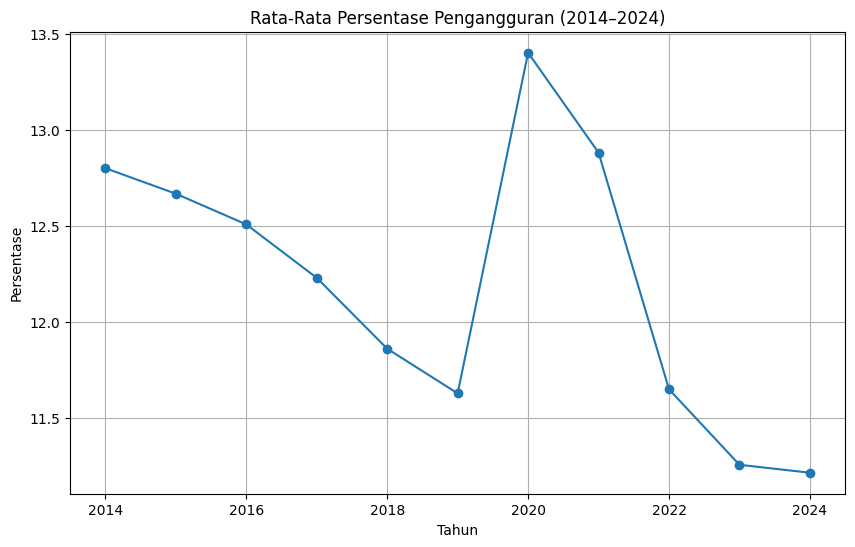

In [138]:
unemployment_avg = [df[f"{year}"].mean() for year in range(2014, 2025)]

plt.figure(figsize=(10, 6))
plt.plot(range(2014, 2025), unemployment_avg, marker='o')
plt.title('Rata-Rata Persentase Pengangguran (2014–2024)')
plt.xlabel('Tahun')
plt.ylabel('Persentase')
plt.grid(True)
plt.show()

# **Feature Selection**

In [139]:
features = [f"{year}" for year in range(2014, 2025)]
df_features = df[features]

df_features.head()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,9.39625,10.84225,12.27650,13.70300,13.72600,13.76575,14.62275,15.08825,20.59775,22.30775,23.62175
1,26.51550,27.07275,24.29625,21.07475,19.04600,18.26250,20.69025,20.12650,18.99000,18.15625,17.82225
2,20.07875,22.77475,21.74250,24.38900,24.75850,25.07025,28.48025,27.43150,25.79900,25.35050,25.10650
3,22.54875,22.49700,22.42900,22.25800,21.98375,21.56400,21.98850,20.55575,19.05525,18.73725,18.53250
4,12.57825,13.26225,14.21925,14.84425,15.75250,16.87075,20.02625,15.32050,12.25650,12.13175,12.01150


# **Modeling**

In [140]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

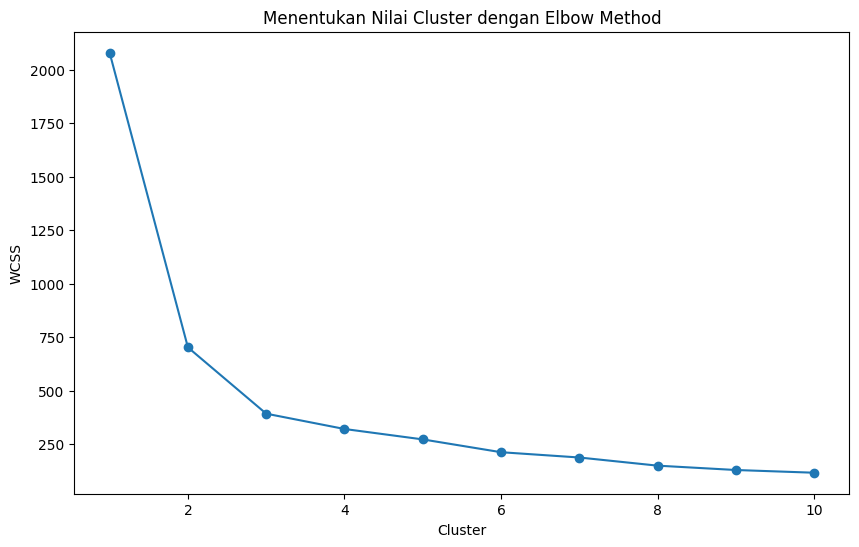

In [141]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)

    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Menentukan Nilai Cluster dengan Elbow Method')
plt.xlabel('Cluster')
plt.ylabel('WCSS')
plt.show()

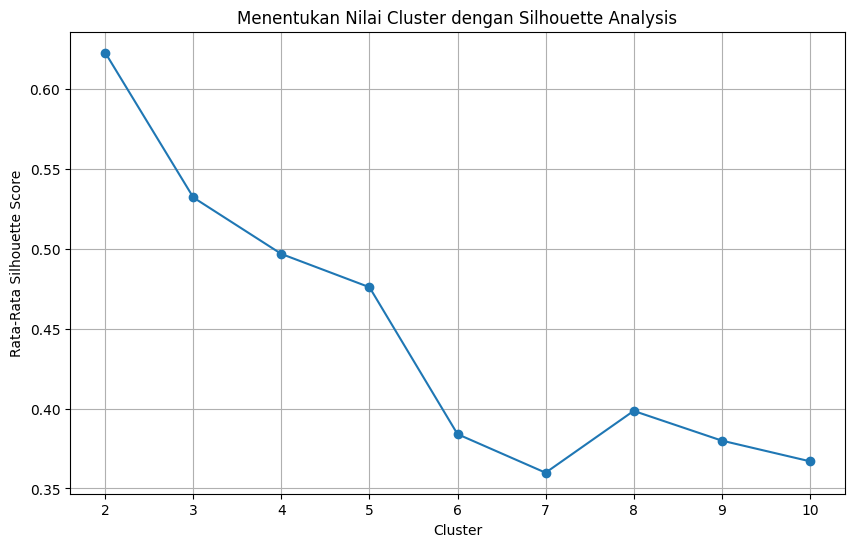

In [142]:
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='-')
plt.title('Menentukan Nilai Cluster dengan Silhouette Analysis')
plt.xlabel('Cluster')
plt.ylabel('Rata-Rata Silhouette Score')
plt.grid(True)
plt.show()

In [143]:
# clusters = 3
clusters = 2
kmeans = KMeans(n_clusters=clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

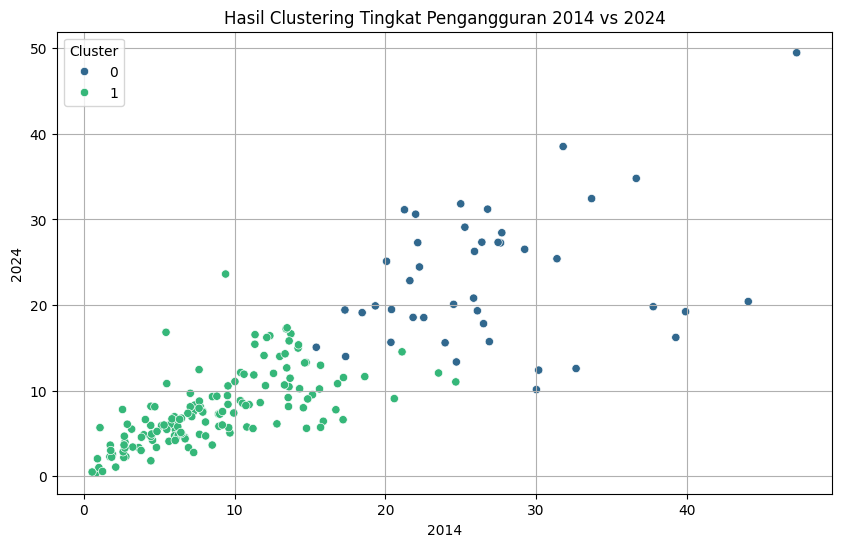

In [144]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['2014'],
    y=df['2024'],
    hue=df['cluster'],
    palette='viridis'
)
plt.title('Hasil Clustering Tingkat Pengangguran 2014 vs 2024')
plt.xlabel('2014')
plt.ylabel('2024')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# **Model Evaluation**

In [145]:
silhouette_score = silhouette_score(df_scaled, df['cluster'])
db_score = davies_bouldin_score(df_scaled, df['cluster'])

print(f"DBI Score: {db_score:.2f}")
print(f"Silhouette Score: {silhouette_score}")

DBI Score: 0.57
Silhouette Score: 0.6227912891746964


# **Analytics**

In [147]:
df['unemployment_avg'] = df[[f"{year}" for year in range(2014, 2025)]].mean(axis=1)
cluster_avg = df.groupby('cluster')['unemployment_avg'].mean().sort_values()
cluster_rank = {cluster: rank+1 for rank, cluster in enumerate(cluster_avg.index)}
df['cluster_rank'] = df['cluster'].map(cluster_rank)
cluster_names = {
    1: "Negara dengan Penanganan Pengangguran Baik",
    2: "Negara dengan Penanganan Pengangguran Buruk"
}
df['cluster_name'] = df['cluster_rank'].map(cluster_names)
df_sorted = df.sort_values(by=['cluster_rank', 'unemployment_avg'], ascending=[True, True])

output_path = '/content/result.csv'
df_sorted[['country_name', 'cluster', 'cluster_name', 'unemployment_avg']].to_csv(output_path, index=False)

for cluster in cluster_avg.index:
    print(f"\nCluster {cluster} (Rata-Rata Pengangguran: {cluster_avg[cluster]:.2f}%)")
    print(df_sorted[df_sorted['cluster'] == cluster]['country_name'].tolist())


Cluster 1 (Rata-Rata Pengangguran: 8.27%)
['Cambodia', 'Niger', 'Qatar', 'Chad', 'Solomon Islands', 'Burundi', 'Moldova, Republic of', 'Madagascar', 'Benin', 'Thailand', 'Cuba', 'Mali', 'Liberia', 'Tanzania, United Republic of', 'Ivory Coast', 'Myanmar', 'Macau, China', 'Papua New Guinea', 'Viet Nam', 'Uganda', 'Guinea-Bissau', 'Ethiopia', 'Japan', 'Guatemala', "Lao People's Democratic Republic", 'Sierra Leone', 'Tonga', 'Kazakhstan', "Korea, Democratic People's Republic of", 'Cameroon', 'Philippines', 'Bahrain', 'Senegal', 'Mozambique', 'Germany', 'Timor-Leste', 'Mexico', 'Ghana', 'Bolivia', 'Kyrgyzstan', 'Iceland', 'Togo', 'Israel', 'Malawi', 'Peru', 'Burkina Faso', 'Korea, Republic of', 'Guinea', 'Switzerland', 'El Salvador', 'Czechia', 'Pakistan', 'Trinidad and Tobago', 'Singapore', 'Ecuador', 'Gambia', 'Congo, Democratic Republic of the', 'Malta', 'Netherlands', 'Turkmenistan', 'Norway', 'Kenya', 'Malaysia', 'Nicaragua', 'Nigeria', 'Hong Kong, China', 'United States', 'United Ara